In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#wordsim353
df1 = pd.read_csv('combined.csv')
palabras = df1.loc[:,['Word 1', 'Word 2']].values
df1[:15]

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62
5,computer,internet,7.58
6,plane,car,5.77
7,train,car,6.31
8,telephone,communication,7.50
9,television,radio,6.77


In [63]:
wx1 = df1.loc[:,['Human (mean)']]
wy1 = list(range(0, len(wx1)))


In [64]:
#valores entre 1 y 0
wx1 = np.concatenate(list(map(lambda n: n/10, df1.loc[:,['Human (mean)']].values)))
wx1[:15]

array([ 0.677,  0.735,  1.   ,  0.746,  0.762,  0.758,  0.577,  0.631,
        0.75 ,  0.677,  0.742,  0.685,  0.619,  0.592,  0.7  ])

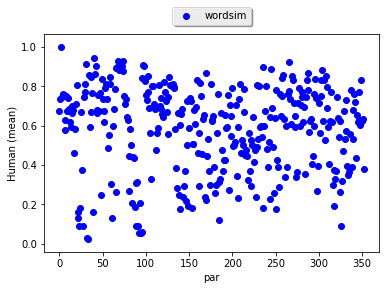

In [80]:
plt.figure()
plt.scatter(wy1, wx1, label = "wordsim", color='b')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.xlabel('par')
plt.ylabel('Human (mean)')

plt.show()
plt.close()

In [6]:
#Archivo con mismas palabras, con el resultado generado con 'Latent Semantic Analysis - Pairwise Comparison'
#tasaALL college - General_Reading_up_to_1st_year_college (300 factors)
#desde http://lsa.colorado.edu/ 
df2 = pd.read_csv('lsaweb_out.csv')
df2[:15]


,Text1,Text2,score
0,love,sex,0.22
1,tiger,cat,0.45
2,tiger,tiger,1.00
3,book,paper,0.11
4,computer,keyboard,0.77
5,computer,internet,NaN
6,plane,car,0.03
7,train,car,0.33
8,telephone,communication,0.49
9,television,radio,0.76


In [7]:
#Si el termino no se encuentra, entonces el score es NaN:
#Can't find any terms from text: 'internet'
#Can't find any terms from text: 'rook'
#Can't find any terms from text: 'Maradona'
#Can't find any terms from text: 'Arafat'
#Can't find any terms from text: 'Arafat'
#Can't find any terms from text: 'Arafat'
#Can't find any terms from text: 'archive' 

In [65]:
wx2 = df2.loc[:,['score']]
wy2 = list(range(0, len(wx2)))


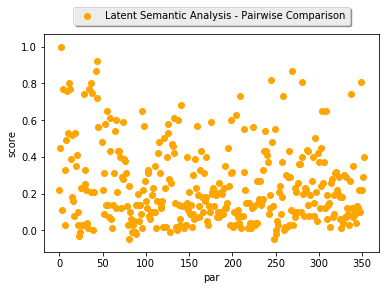

In [74]:
plt.figure()
plt.scatter(wy2, wx2, label = "Latent Semantic Analysis - Pairwise Comparison", color='orange')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.xlabel('par')
plt.ylabel('score')
plt.show()
plt.close()

In [23]:
import gensim

In [11]:
#El limite es por el uso de la memoria
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, limit=500000)


In [12]:
#Encabezado
pd.DataFrame(columns=['Text1','Text2','score']).to_csv('word2vec_out.csv', columns=['Text1','Text2','score'], index =False)

df3 = pd.DataFrame({})

for par in palabras:    
    score = model.similarity(par[0], par[1])
    serie = pd.Series([par[0], par[1], score])
    df3=df3.append(serie, ignore_index=True)
    #print(par[0], par[1], score)
    
df3.to_csv('word2vec_out.csv', mode='a', header=False, index =False) 


In [13]:
df3 = pd.read_csv('word2vec_out.csv')
df3[:15]

,Text1,Text2,score
0,love,sex,0.263938
1,tiger,cat,0.517296
2,tiger,tiger,1.000000
3,book,paper,0.363463
4,computer,keyboard,0.396392
5,computer,internet,0.406862
6,plane,car,0.377970
7,train,car,0.340256
8,telephone,communication,0.332185
9,television,radio,0.611497


In [66]:
wx3 = df3.loc[:,['score']]
wy3 = list(range(0, len(wx3)))


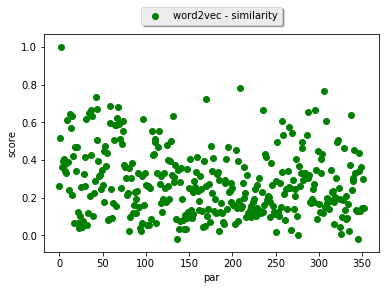

In [75]:
plt.figure()
plt.scatter(wy3, wx3, label = "word2vec - similarity", color='g')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.xlabel('par')
plt.ylabel('score')
plt.show()
plt.close()

In [16]:
from nltk.corpus import wordnet

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
#Encabezado
pd.DataFrame(columns=['Text1','Text2','score']).to_csv('wordnet_out.csv', columns=['Text1','Text2','score'], index =False)

df4 = pd.DataFrame({})

for par in palabras:
    try:
        sp1 = wordnet.synset("{}.n.01".format(par[0]))
        sp2 = wordnet.synset("{}.n.01".format(par[1]))
        score = sp1.wup_similarity(sp2) #Wu-Palmer Similarity
    except Exception:
        score='N/A'

    serie = pd.Series([par[0], par[1], score])
    df4=df4.append(serie, ignore_index=True)
    
df4.to_csv('wordnet_out.csv', mode='a', header=False, index =False) 

In [25]:
#Si el termino no se encuentra, entonces el score es NaN:
#media radio
#stock live
#Maradona football
#drink eat
#street children
#media trading
#media gain
#investor earning
#fighting defeating

In [26]:
df4 = pd.read_csv('wordnet_out.csv')
df4[:15]

,Text1,Text2,score
0,love,sex,0.153846
1,tiger,cat,0.545455
2,tiger,tiger,0.750000
3,book,paper,0.250000
4,computer,keyboard,0.823529
5,computer,internet,0.631579
6,plane,car,0.666667
7,train,car,0.666667
8,telephone,communication,0.133333
9,television,radio,0.900000


In [67]:
wx4 = df4.loc[:,['score']]
wy4 = list(range(0, len(wx4)))

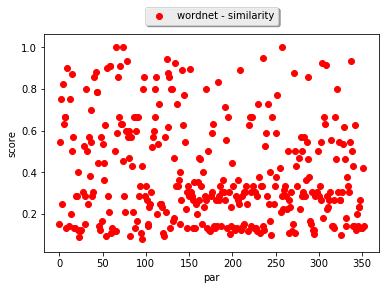

In [76]:
plt.figure()
plt.scatter(wy4, wx4, label = "wordnet - similarity", color='r')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.xlabel('par')
plt.ylabel('score')
plt.show()
plt.close()


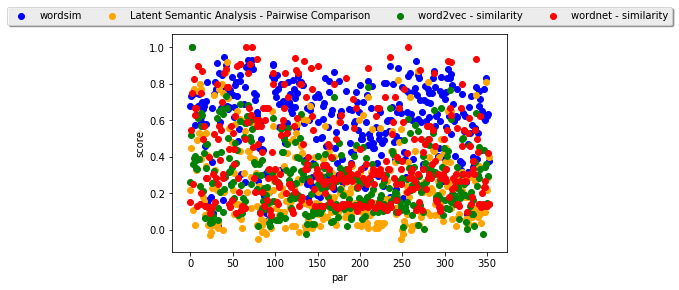

In [81]:
plt.figure()
plt.scatter(wy1, wx1, label = "wordsim", color='b')
plt.scatter(wy2, wx2, label = "Latent Semantic Analysis - Pairwise Comparison", color='orange')
plt.scatter(wy3, wx3, label = "word2vec - similarity", color='g')
plt.scatter(wy4, wx4, label = "wordnet - similarity", color='r')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.xlabel('par')
plt.ylabel('score')
plt.show()
plt.close()

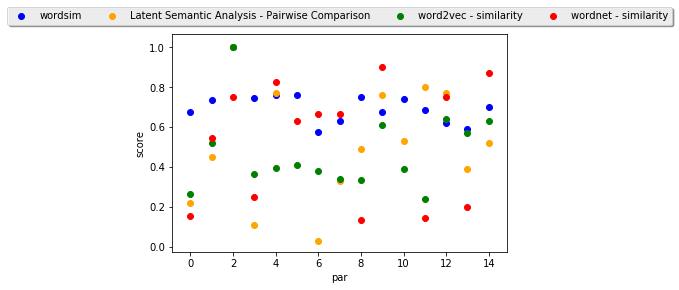

In [82]:
#Comparo solo los primeros
plt.figure()
plt.scatter(wy1[:15], wx1[:15], label = "wordsim", color='b')
plt.scatter(wy2[:15], wx2[:15], label = "Latent Semantic Analysis - Pairwise Comparison", color='orange')
plt.scatter(wy3[:15], wx3[:15], label = "word2vec - similarity", color='g')
plt.scatter(wy4[:15], wx4[:15], label = "wordnet - similarity", color='r')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.xlabel('par')
plt.ylabel('score')
plt.show()
plt.close()

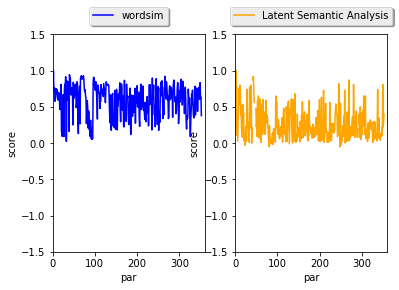

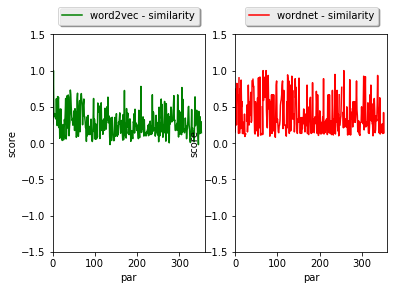

In [84]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(wy1, wx1, label = "wordsim", color='b')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.axis([0,360,-1.5,1.5])
plt.xlabel('par')
plt.ylabel('score')

plt.subplot(1,2,2)
plt.plot(wy2, wx2, label = "Latent Semantic Analysis",  color='orange')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.axis([0,360,-1.5,1.5])
plt.xlabel('par')
plt.ylabel('score')

plt.show()

plt.figure()
plt.subplot(1,2,1)
plt.plot(wy3, wx3, label = "word2vec - similarity",  color='g')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.axis([0,360,-1.5,1.5])
plt.xlabel('par')
plt.ylabel('score')

plt.subplot(1,2,2)
plt.plot(wy4, wx4, label = "wordnet - similarity", color='r')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.axis([0,360,-1.5,1.5])
plt.xlabel('par')
plt.ylabel('score')

plt.show()
plt.close()

In [31]:
#Limpieza y normalizacion
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

In [32]:
data = [wx1, np.concatenate(list(wx2.values)), np.concatenate(list(wx3.values)), np.concatenate(list(wx4.values))]
data

[array([ 0.677,  0.735,  1.   ,  0.746,  0.762,  0.758,  0.577,  0.631,
         0.75 ,  0.677,  0.742,  0.685,  0.619,  0.592,  0.7  ,  0.662,
         0.681,  0.462,  0.581,  0.708,  0.808,  0.162,  0.131,  0.092,
         0.181,  0.669,  0.373,  0.092,  0.746,  0.812,  0.773,  0.915,
         0.031,  0.023,  0.858,  0.592,  0.669,  0.846,  0.765,  0.162,
         0.944,  0.862,  0.903,  0.681,  0.663,  0.756,  0.673,  0.765,
         0.25 ,  0.838,  0.738,  0.619,  0.673,  0.792,  0.812,  0.735,
         0.488,  0.554,  0.846,  0.813,  0.304,  0.131,  0.596,  0.687,
         0.785,  0.265,  0.894,  0.896,  0.929,  0.883,  0.91 ,  0.887,
         0.902,  0.929,  0.879,  0.752,  0.71 ,  0.738,  0.646,  0.627,
         0.269,  0.446,  0.585,  0.5  ,  0.208,  0.442,  0.438,  0.185,
         0.308,  0.092,  0.315,  0.092,  0.054,  0.208,  0.054,  0.062,
         0.842,  0.908,  0.904,  0.827,  0.757,  0.729,  0.85 ,  0.773,
         0.688,  0.565,  0.331,  0.8  ,  0.8  ,  0.708,  0.685, 

In [33]:
#Reemplazo NaN
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(data)
data1 = imp.transform(data)
data1


array([[ 0.677     ,  0.735     ,  1.        , ...,  0.625     ,
         0.634     ,  0.378     ],
       [ 0.22      ,  0.45      ,  1.        , ...,  0.22      ,
         0.29      ,  0.4       ],
       [ 0.26393773,  0.51729619,  1.        , ...,  0.1452283 ,
         0.29663557,  0.14309331],
       [ 0.15384615,  0.54545455,  0.75      , ...,  0.13333333,
         0.42105263,  0.14285714]])

In [35]:
#transformo los datos
scaler = StandardScaler()
scaler.fit(data1)
StandardScaler(copy=True, with_mean=True, with_std=True)
www = scaler.transform(data1)

In [36]:
www

array([[ 1.7000729 ,  1.63628685,  0.57735027, ...,  1.70833247,
         1.60572447,  0.90876304],
       [-0.53054533, -1.05835958,  0.57735027, ..., -0.3022905 ,
        -0.86486452,  1.08725032],
       [-0.31608515, -0.42208085,  0.57735027, ..., -0.6734947 ,
        -0.81720819, -0.99704868],
       [-0.85344243, -0.15584642, -1.73205081, ..., -0.73254727,
         0.07634824, -0.99896468]])

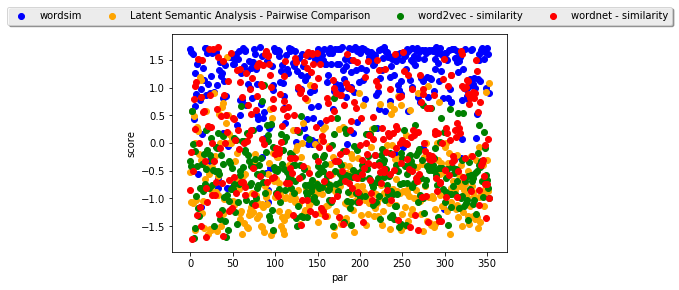

In [85]:
plt.figure()
plt.scatter(wy1, www[0], label = "wordsim", color='b')
plt.scatter(wy2, www[1], label = "Latent Semantic Analysis - Pairwise Comparison", color='orange')
plt.scatter(wy3, www[2], label = "word2vec - similarity", color='g')
plt.scatter(wy4, www[3], label = "wordnet - similarity", color='r')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.xlabel('par')
plt.ylabel('score')
plt.show()
plt.close()

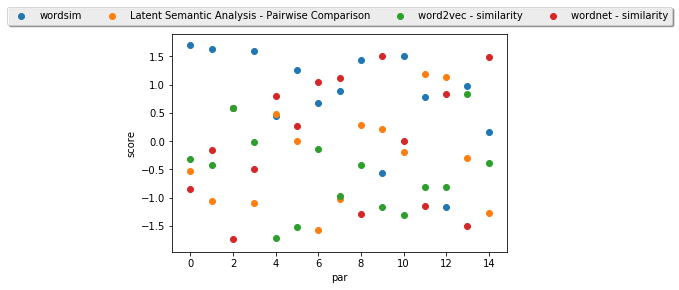

In [38]:
, 

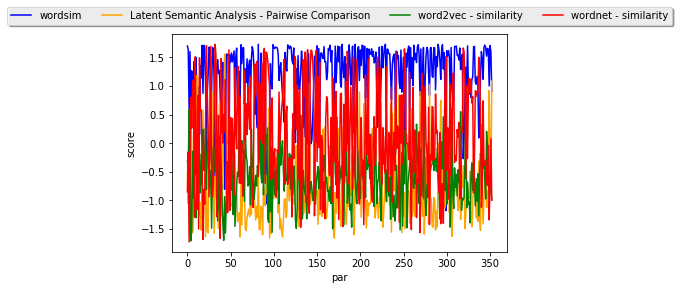

In [86]:
plt.figure()
plt.plot(wy1, www[0], label = "wordsim", color='b')
plt.plot(wy2, www[1], label = "Latent Semantic Analysis - Pairwise Comparison", color='orange')
plt.plot(wy3, www[2], label = "word2vec - similarity", color='g')
plt.plot(wy4, www[3], label = "wordnet - similarity", color='r')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.xlabel('par')
plt.ylabel('score')
plt.show()
plt.close()

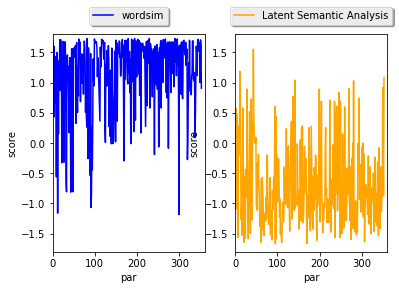

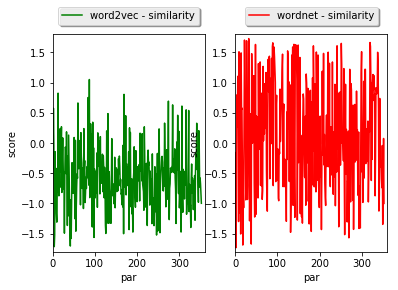

In [87]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(wy1, www[0], label = "wordsim", color='b')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.axis([0,360,-1.8,1.8])
plt.xlabel('par')
plt.ylabel('score')

plt.subplot(1,2,2)
plt.plot(wy2, www[1], label = "Latent Semantic Analysis",  color='orange')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.axis([0,360,-1.8,1.8])
plt.xlabel('par')
plt.ylabel('score')

plt.show()

plt.figure()
plt.subplot(1,2,1)
plt.plot(wy3, www[2], label = "word2vec - similarity",  color='g')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.axis([0,360,-1.8,1.8])
plt.xlabel('par')
plt.ylabel('score')

plt.subplot(1,2,2)
plt.plot(wy4, www[3], label = "wordnet - similarity", color='r')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.axis([0,360,-1.8,1.8])
plt.xlabel('par')
plt.ylabel('score')

plt.show()
plt.close()

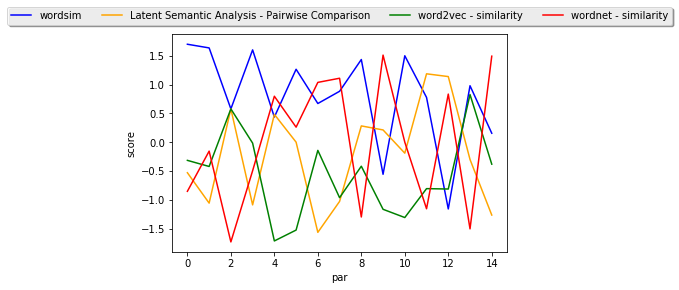

In [89]:
plt.figure()
plt.plot(wy1[:15], www[0][:15], label = "wordsim", color='b')
plt.plot(wy2[:15], www[1][:15], label = "Latent Semantic Analysis - Pairwise Comparison", color='orange')
plt.plot(wy3[:15], www[2][:15], label = "word2vec - similarity", color='g')
plt.plot(wy4[:15], www[3][:15], label = "wordnet - similarity", color='r')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.xlabel('par')
plt.ylabel('score')
plt.show()
plt.close()

In [59]:
len(palabras)

353